In [ ]:
import json
import requests as rq
import pandas as pd
import numpy as np
import time
import itertools
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
G=nx.Graph()
import pymongo
from pymongo import MongoClient
import community

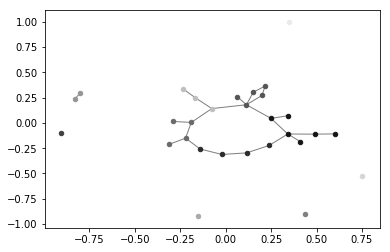

In [ ]:
#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

194
193


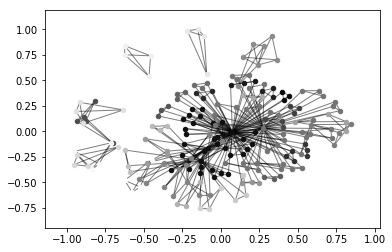

In [ ]:
#G = nx.read_graphml("playerNetwork_35377266.graphml")

G = nx.read_graphml("playerNetwork_48610412.graphml")

print(len(list(G.nodes())))
G.remove_node(G.graph['ego_id'])
print(len(list(G.nodes())))
#first compute the best partition
partition = community.best_partition(G, weight= 'weight')

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [ ]:
partition.values()

dict_values([0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 1, 1, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1, 1, 1, 1, 1, 21, 21, 21, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 1, 1, 1, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 1, 1, 1, 1, 1, 1, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 1, 16, 16, 16, 16, 16, 16, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 1, 1])

In [ ]:
old

dict_values([0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 1, 1, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1, 1, 1, 1, 1, 21, 21, 21, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1, 1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 1, 1, 1, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 1, 1, 1, 1, 1, 1, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 1, 16, 16, 16, 16, 16, 16, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 1, 1])

In [ ]:
nx.number_connected_components(G)

11

In [ ]:
community.modularity(partition, G)

0.5485891051757961

In [ ]:
nx.average_clustering(G)

0.9445321605004289

In [ ]:
nx.density(G)

0.022506476683937824

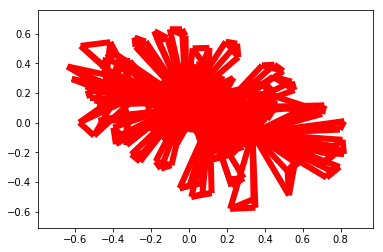

0.772020725388601

In [ ]:
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
G0 = Gcc[0]
nx.draw_networkx_edges(G0, pos,
                           with_labels=False,
                           edge_color='r',
                           width=6.0
                          )
plt.show()
len(list(G0.nodes()))/len(list(G.nodes()))

In [ ]:
#avg degree
degrees = G.degree()
sum_of_edges = 0
for a, b in list(degrees):
    sum_of_edges = sum_of_edges + b
sum_of_edges/len(list(G.nodes()))

4.321243523316062

In [ ]:
#no es muy interesante
nx.diameter(G0)

4

In [ ]:
nx.graph_number_of_cliques(G)

82

In [ ]:
def most_important(H):
    """ returns a copy of G with
     the most important nodes
     according to the pagerank """
    ranking = nx.betweenness_centrality(H, weight= 'weight').items()
    print(ranking)
    r = [x[1] for x in ranking]
    m = sum(r)/len(r) # mean centrality
    t = m*3 # threshold, we keep only the nodes with 3 times the mean
    Gt = H.copy()
    for k, v in ranking:
        if v < t:
            Gt.remove_node(k)
    return Gt, m

Gt, m = most_important(G) # trimming

dict_items([('30177998', 0.0), ('44357263', 0.0), ('58301924', 0.36405982552096194), ('72632357', 0.0), ('31028329', 0.0), ('37904084', 0.0), ('43220375', 0.0), ('62950462', 0.006382406337628169), ('74756915', 0.016803040081068036), ('32792748', 0.0018661749895448041), ('60342086', 0.0018661749895448041), ('20892164', 0.0), ('21401644', 0.0), ('48964233', 0.0), ('61664650', 0.0), ('72459927', 0.0), ('77587176', 0.0), ('31877815', 0.0), ('36743390', 0.0), ('43170629', 0.0), ('77800114', 0.0), ('24870714', 0.0), ('29422569', 0.0), ('36336867', 0.0004845540902365245), ('67791315', 0.0004845540902365245), ('92247263', 0.0004845540902365245), ('27508528', 0.0004845540902365245), ('43050844', 0.0004845540902365245), ('61711724', 0.0004845540902365245), ('80307375', 0.0004845540902365245), ('81147149', 0.0004845540902365245), ('51320609', 0.0), ('51947918', 0.0), ('85298308', 0.0), ('76727268', 0.0), ('20661722', 0.0), ('35298998', 0.0), ('53183460', 1.817917393833624e-05), ('60818688', 1.817

In [ ]:
len(list(Gt))/len(list(G.nodes()))

0.031088082901554404

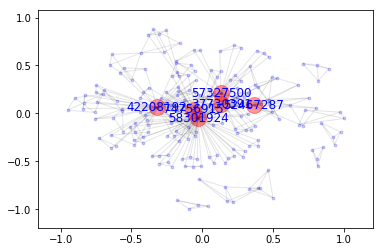

In [ ]:
from pylab import show
# create the layout
pos = nx.spring_layout(G)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(G,pos,alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

0.0004876293031190525